In [1]:
import warnings
import gym
import neurogym as ngym
from neurogym.utils import plotting, info
#import warnings
import numpy as np
from neurogym.wrappers import monitor
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  #, ACER, PPO2
warnings.filterwarnings('ignore')

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### MotorTiming
Doc: Agents have to produce different time intervals
    using different effectors (actions).

    Args:
        prod_margin: controls the interval around the ground truth production
                    time within which the agent receives proportional reward
    
Reference paper 
[Flexible timing by temporal scaling of cortical responses](https://www.nature.com/articles/s41593-017-0028-6)

Reward structure 
abort : -0.1
correct : 1.0
fail : 0.0

Tags: timing, go-no-go, supervised.



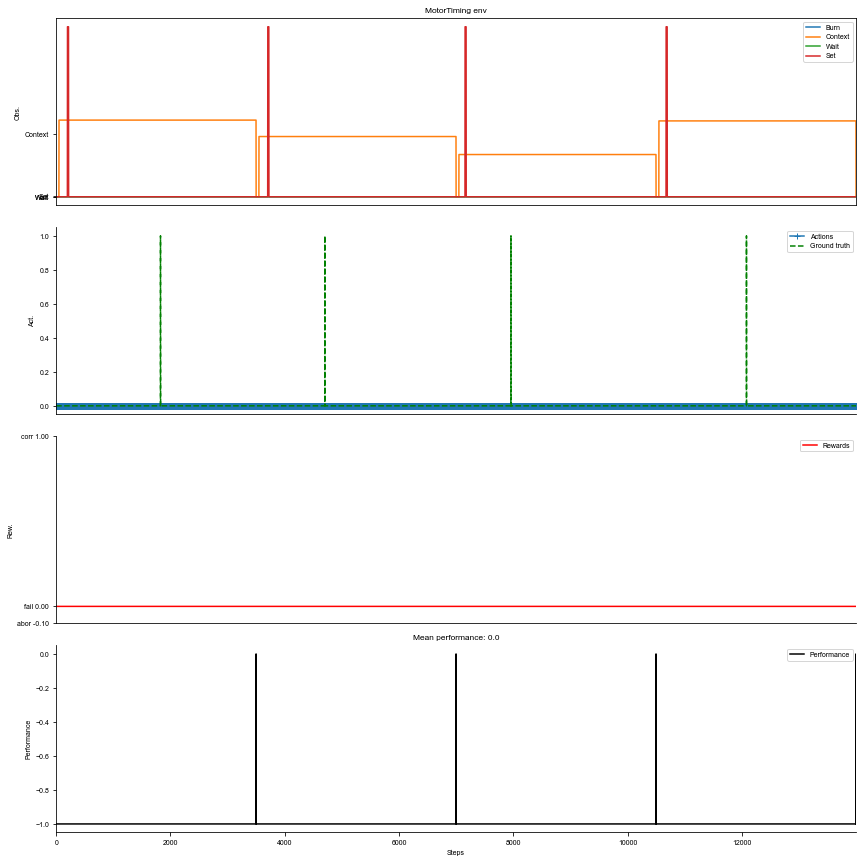

In [2]:
#info.all_tasks()
task = 'MotorTiming-v0'
env = gym.make(task);
print(env)
plotting.plot_env(env, num_steps=14000, def_act=0, ob_traces=['Burn', 'Context', 'Wait', 'Set'], fig_kwargs={'figsize': (12, 12)});

In [5]:
warnings.filterwarnings('ignore')

# task paremters
task = 'MotorTiming-v0'

# build task
env = gym.make(task, **kwargs)

# Apply the wrapper
env = monitor.Monitor(env, folder='content/tests/', sv_per=10000, verbose=1, sv_fig=True, num_stps_sv_fig=100)

# the env is now wrapped automatically when passing it to the constructor
env = DummyVecEnv([lambda: env])
model = A2C(LstmPolicy, env, gamma=1, alpha=1, verbose=1, policy_kwargs={'feature_extraction':"mlp", 'n_lstm':200})

print("Model Learn")
model.learn(total_timesteps=500000, log_interval=100000)
print("Done")

env.close()

NameError: name 'kwargs' is not defined